# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** Sean McManus

**Dataset:** Global_Space_Exploration_Dataset.csv

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

Success Rate (as in success rate of the mission) would be the Target Variable, for Success rate % column. This column is a "historical reliability metric". It reflects the track record of that specific "Mission Profile", so not just a single mission, but a ratio of successful mission outcomes to total attempts for specific peramaters (the features of the history of attempts, like technology, space agency, and type of mission)

---

### 1.2 Why does this prediction matter?

*Who would care about this prediction? What decisions could be made with it?*

**Your answer:**

the Success rate output for the target variable would explain the probability of mission success as a risk dcore for all of the "inputs" into a space mission. You can use it to make a call as to whether or not the attempt is worth it (like 98% vs 60% success) for the amount of money put in, along with all the other factors of the mission.

---

### 1.3 What features might help predict the target?

*Based on your intuition and domain knowledge, what columns do you think will be most important?*

**Your answer:**

There are a lot of features for the data:
['Country', 'Year', 'Mission Name', 'Mission Type', 'Launch Site', 'Satellite Type', 'Budget (in Billion $)', 'Success Rate (%)', 'Technology Used', 'Environmental Impact', 'Collaborating Countries', 'Duration (in Days)']

while I do think having a proper name for a space mission is important for morale, I don't think it is going to make too much of a differrence in the numbers. I think "Collaborating Countries" "Budget (in Billion $)" and "Mission Type" will be most important. and probably "year". I'd say more recent missions are probaby going to do better with experience too, but i can't say for certain.

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [2]:
# Load your dataset
# Update the path to match your file name
# ****Regulalar code for pd.read_csv() function not working with the file i downloaded
# Goodle says its a common issue with OneDrive file paths and do a "raw string" by adding an r before the path string
# found it with the explorer search in the left bar of VS code
df = pd.read_csv(r'C:\Users\ssman\OneDrive\Desktop\Class Work\Space Mission Dataset\Global_Space_Exploration_Dataset.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 3,000 rows, 12 columns

Column names:
['Country', 'Year', 'Mission Name', 'Mission Type', 'Launch Site', 'Satellite Type', 'Budget (in Billion $)', 'Success Rate (%)', 'Technology Used', 'Environmental Impact', 'Collaborating Countries', 'Duration (in Days)']


In [3]:
# TODO: View the first 5 rows of your dataframe
#
# Hint: Use .head()

# YOUR CODE HERE:
df.head()

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236
2,Israel,2013,Reactive disintermediate projection,Manned,Port Kaitlynstad,Communication,28.73,54,AI Navigation,Medium,"China, Israel, USA",238
3,UAE,2010,Grass-roots 6thgeneration implementation,Unmanned,Mariastad,Spy,37.27,58,Traditional Rocket,Low,USA,186
4,India,2006,Balanced discrete orchestration,Manned,North Jasonborough,Weather,18.95,91,Solar Propulsion,Medium,"Israel, China, India",277


In [4]:
# TODO: View the last 5 rows of your dataframe
#
# Hint: Use .tail()

df.tail()



,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
2995,China,2023,Synergistic scalable intranet,Manned,East Shawna,Spy,22.11,68,Traditional Rocket,Medium,Israel,338
2996,France,2009,Team-oriented value-added extranet,Manned,Douglasborough,Communication,47.72,96,Nuclear Propulsion,Medium,"Germany, Israel, UK",336
2997,India,2020,Face-to-face even-keeled matrix,Unmanned,Bellhaven,Weather,14.58,83,Reusable Rocket,Low,"Japan, Russia, France",3
2998,Russia,2002,Open-source secondary software,Manned,Deniseview,Weather,13.69,66,Solar Propulsion,Low,"UAE, India, France",339
2999,Japan,2014,Public-key cohesive artificial intelligence,Manned,Port Brittany,Navigation,20.51,95,Nuclear Propulsion,Medium,Israel,210


### 2.2 Data Types and Info

In [5]:
# TODO: Display info about your dataframe (data types, non-null counts)
#
# Hint: Use .info()

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  3000 non-null   object 
 1   Year                     3000 non-null   int64  
 2   Mission Name             3000 non-null   object 
 3   Mission Type             3000 non-null   object 
 4   Launch Site              3000 non-null   object 
 5   Satellite Type           3000 non-null   object 
 6   Budget (in Billion $)    3000 non-null   float64
 7   Success Rate (%)         3000 non-null   int64  
 8   Technology Used          3000 non-null   object 
 9   Environmental Impact     3000 non-null   object 
 10  Collaborating Countries  3000 non-null   object 
 11  Duration (in Days)       3000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 281.4+ KB


In [6]:
# TODO: Get summary statistics for numerical columns
#
# Hint: Use .describe()

df.describe()


,Year,Budget (in Billion $),Success Rate (%),Duration (in Days)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.471000,25.428917,74.985000,181.483000
std,7.437177,14.108438,14.945252,104.983822
min,2000.000000,0.530000,50.000000,1.000000
25%,2006.000000,12.977500,62.000000,91.000000
50%,2012.000000,25.495000,75.000000,180.000000
75%,2019.000000,37.597500,88.000000,272.000000
max,2025.000000,49.970000,100.000000,365.000000


In [7]:
# TODO: Get summary statistics for categorical columns
#
# Hint: Use .describe(include='object')

df.describe(include='object')


,Country,Mission Name,Mission Type,Launch Site,Satellite Type,Technology Used,Environmental Impact,Collaborating Countries
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,10,2996,2,2702,5,5,3,639
top,China,Diverse non-volatile instruction set,Manned,West Michael,Research,Traditional Rocket,Medium,Germany
freq,322,2,1528,5,649,650,1032,115


I'm not completely sure what some of the above data is stating, specifically the "freq"

### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**
This Is a space mission dataset from Kaggle that relies on hystorical data from previous space missions, however some of the data is synthetic for certain countries based off their disclosure of information as it turns out... probably some geopolitical reasons and such...
-https://www.google.com/search?q=https://www.kaggle.com/datasets/piumallick/global-space-exploration-dataset-2000-2025

for the rows, Each data point represents a "unique mission profile summary" fora specific type of exploration effort with different logistical and financial factors (e.g., a "Mars Rover" mission using "Solar Propulsion" by "NASA" in a specific year) and the historical reliability (Success Rate %) for that specific combination of factors.

There are 11 useable columns as I see it, with Name of Mission proably being used for an identifier, where an ID number might be better. Im curious to see if environmental impact is going to be important for success rate.


There is Numerical AND catigorical data! 
Numerical data is length of mission, cost in billions, year, and success rate
the rest are catigorical, like type of mission, or technology for propulsion, or countries involved.
I'm pretty excited.


## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [8]:
# Define your target variable
success_rate = 'Success Rate (%)'  

# Basic statistics of target
print(f"Target Variable: {success_rate}")
print(f"\nBasic Statistics:")
print(df[success_rate].describe())

Target Variable: Success Rate (%)

Basic Statistics:
count    3000.000000
mean       74.985000
std        14.945252
min        50.000000
25%        62.000000
50%        75.000000
75%        88.000000
max       100.000000
Name: Success Rate (%), dtype: float64


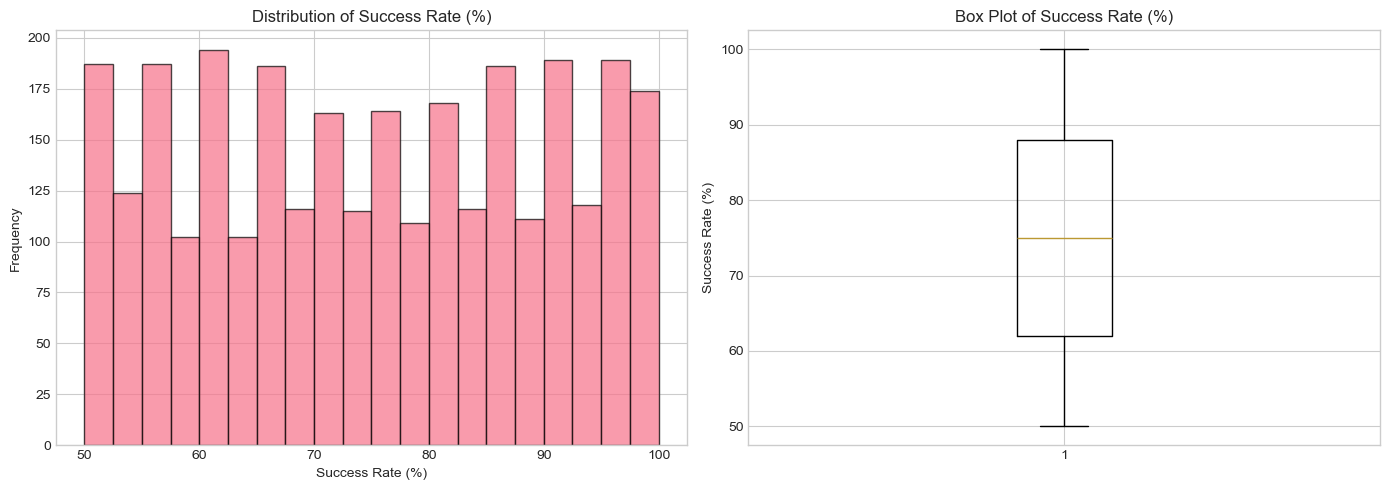


Skewness: 0.00
→ Target is approximately symmetric.


In [9]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[success_rate].dropna(), bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(success_rate)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {success_rate}')

# Box plot
axes[1].boxplot(df[success_rate].dropna())
axes[1].set_ylabel(success_rate)
axes[1].set_title(f'Box Plot of {success_rate}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[success_rate].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

********either i did this wrong, or that data was made to look extremely symmetric, and I'm not sure I like that*****
I guess I'll see moving forward based off of feature comparison.

### 3.2 Data Quality Checks

In [10]:
# TODO: Check for duplicate rows in your dataframe
#
# Steps:
# 1. Count how many duplicate rows exist using df.duplicated().sum()
duplicate_count = df.duplicated().sum()
# 2. Print the count and the percentage of duplicates
total_rows = len(df) 
duplicate_percentage = (duplicate_count / total_rows) * 100
# Expected output format:
# "Duplicate rows: X,XXX (X.XX%)" *** could mix these up if not careful! do not forget to format percentage with two decimal places!
print(f"Duplicate rows: {duplicate_count:,} ({duplicate_percentage:.2f}%)")

#no need to drop duplicates BABYYYY!

Duplicate rows: 0 (0.00%)


In [11]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
missing_count = df.isnull().sum()


# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# len(df) can be used for ALL total numbers of the dataset rows!!@
missing_percentage = (df.isnull().sum() / len(df)) * 100


# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})


# 4. Sort by 'Missing %' descending
missing_df = missing_df.sort_values(by='Missing %', ascending=False)

# 5. Display only columns that have missing values
#**missing_df = missing_df['Missing Count'] > 0] is NOT WORKING PROPERLY??? **HOLD up previous example from day work have it doubled 

missing_df = missing_df[missing_df['Missing Count'] > 0]




In [12]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]  #AHA its here too! thanks for the check!
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

✓ No missing values in the dataset!


### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*

**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

I hope I did this correctly, because the data is EXTREMELY NORMAL. like 0% skewed.. thats kinda sad because i was hoping for a more historically accurate dataset (I think that woud be unnatural given how hardd everyone tries not to have mission failure, but I guess certain parameters could mean a mission "FAILED" as it did not live up to expectation but come on, 0%??) 
 No Outliers in the target.
 No missing data
 No duplicate rows.
 Im hoping this data is synthetic for values of mission data for countries that have non-disclosure so they did it to round out the data. I hope the US mission data is accurate at least kinda weird
 ****Please ask Abishek if this synthetic data is ok

---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [13]:
# TODO: Get a list of numerical columns (excluding the target)
#
# Steps:
# 1. Use df.select_dtypes(include=[np.number]) to get numerical columns
# 2. Get the column names as a list with .columns.tolist()
# 3. Remove TARGET from the list if it's in there *****#target is "Success Rate (%)" or success_rate
# 4. Print the count and list of numerical features   Len? len(numerical_cols) 
#
# Store result in: numerical_cols

# YOUR CODE HERE:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if success_rate in numerical_cols:
    numerical_cols.remove(success_rate)

print(f"Numerical Features: {numerical_cols}")
print(f"Count of Numerical Features: {len(numerical_cols)}")


Numerical Features: ['Year', 'Budget (in Billion $)', 'Duration (in Days)']
Count of Numerical Features: 3


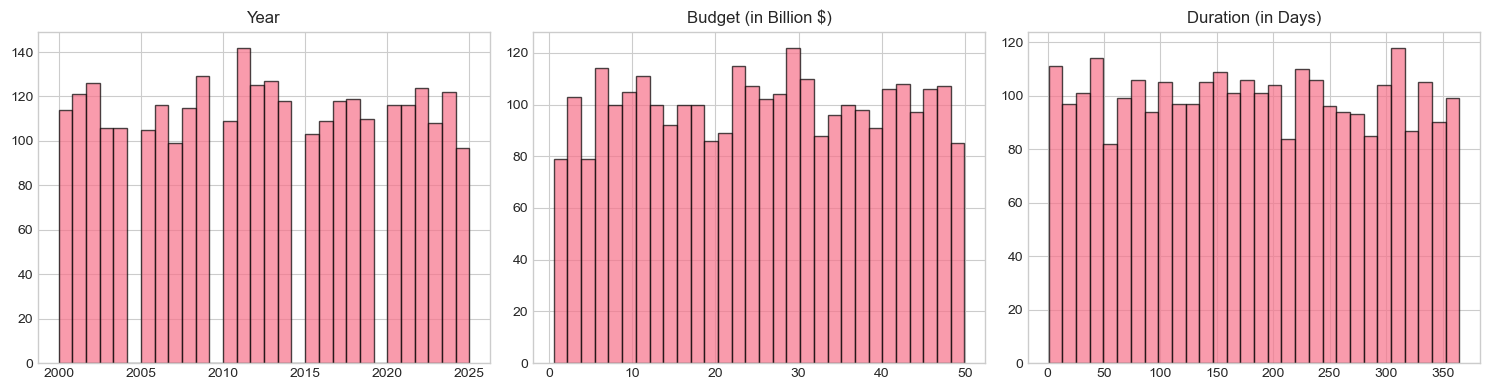

In [14]:
# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found (besides target).")

### 4.2 Categorical Features Analysis

In [ ]:
# TODO: Get a list of categorical columns and explore their values
#
# Steps:
# 1. Use df.select_dtypes(include=['object', 'category']) to get categorical columns
# 2. Get the column names as a list
# 3. Print the count and list of categorical features
# 4. For each categorical column, *** print: For can make for loop with f string
#    - Number of unique values: df[col].nunique() #nunique()? ***can be used to get rid of useless unique values like IDs
#    - Top 10 value counts: df[col].value_counts().head(10)
#
# Store result in: categorical_cols

# YOUR CODE HERE:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical Features: {categorical_cols}")
print(f"Count of Categorical Features: {len(categorical_cols)}")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {df[col].nunique()}")  #nunique
    print(f"Top 10 value counts:\n{df[col].value_counts().head(10)}")
    print("-" * 20) # USING THIS AS A SEPARATOR IS COOL AS HELL

Categorical Features: ['Country', 'Mission Name', 'Mission Type', 'Launch Site', 'Satellite Type', 'Technology Used', 'Environmental Impact', 'Collaborating Countries']
Count of Categorical Features: 8

Column: Country
Number of unique values: 10
Top 10 value counts:
Country
China      322
UK         322
Israel     313
France     311
UAE        305
USA        304
India      294
Japan      290
Russia     289
Germany    250
Name: count, dtype: int64
--------------------

Column: Mission Name
Number of unique values: 2996
Top 10 value counts:
Mission Name
Diverse non-volatile instruction set      2
Pre-emptive neutral infrastructure        2
Devolved exuding array                    2
Customer-focused leadingedge emulation    2
Sharable tertiary superstructure          1
Digitized eco-centric challenge           1
Multi-lateral full-range alliance         1
Down-sized grid-enabled structure         1
Open-architected secondary project        1
User-friendly disintermediate toolset     1
N

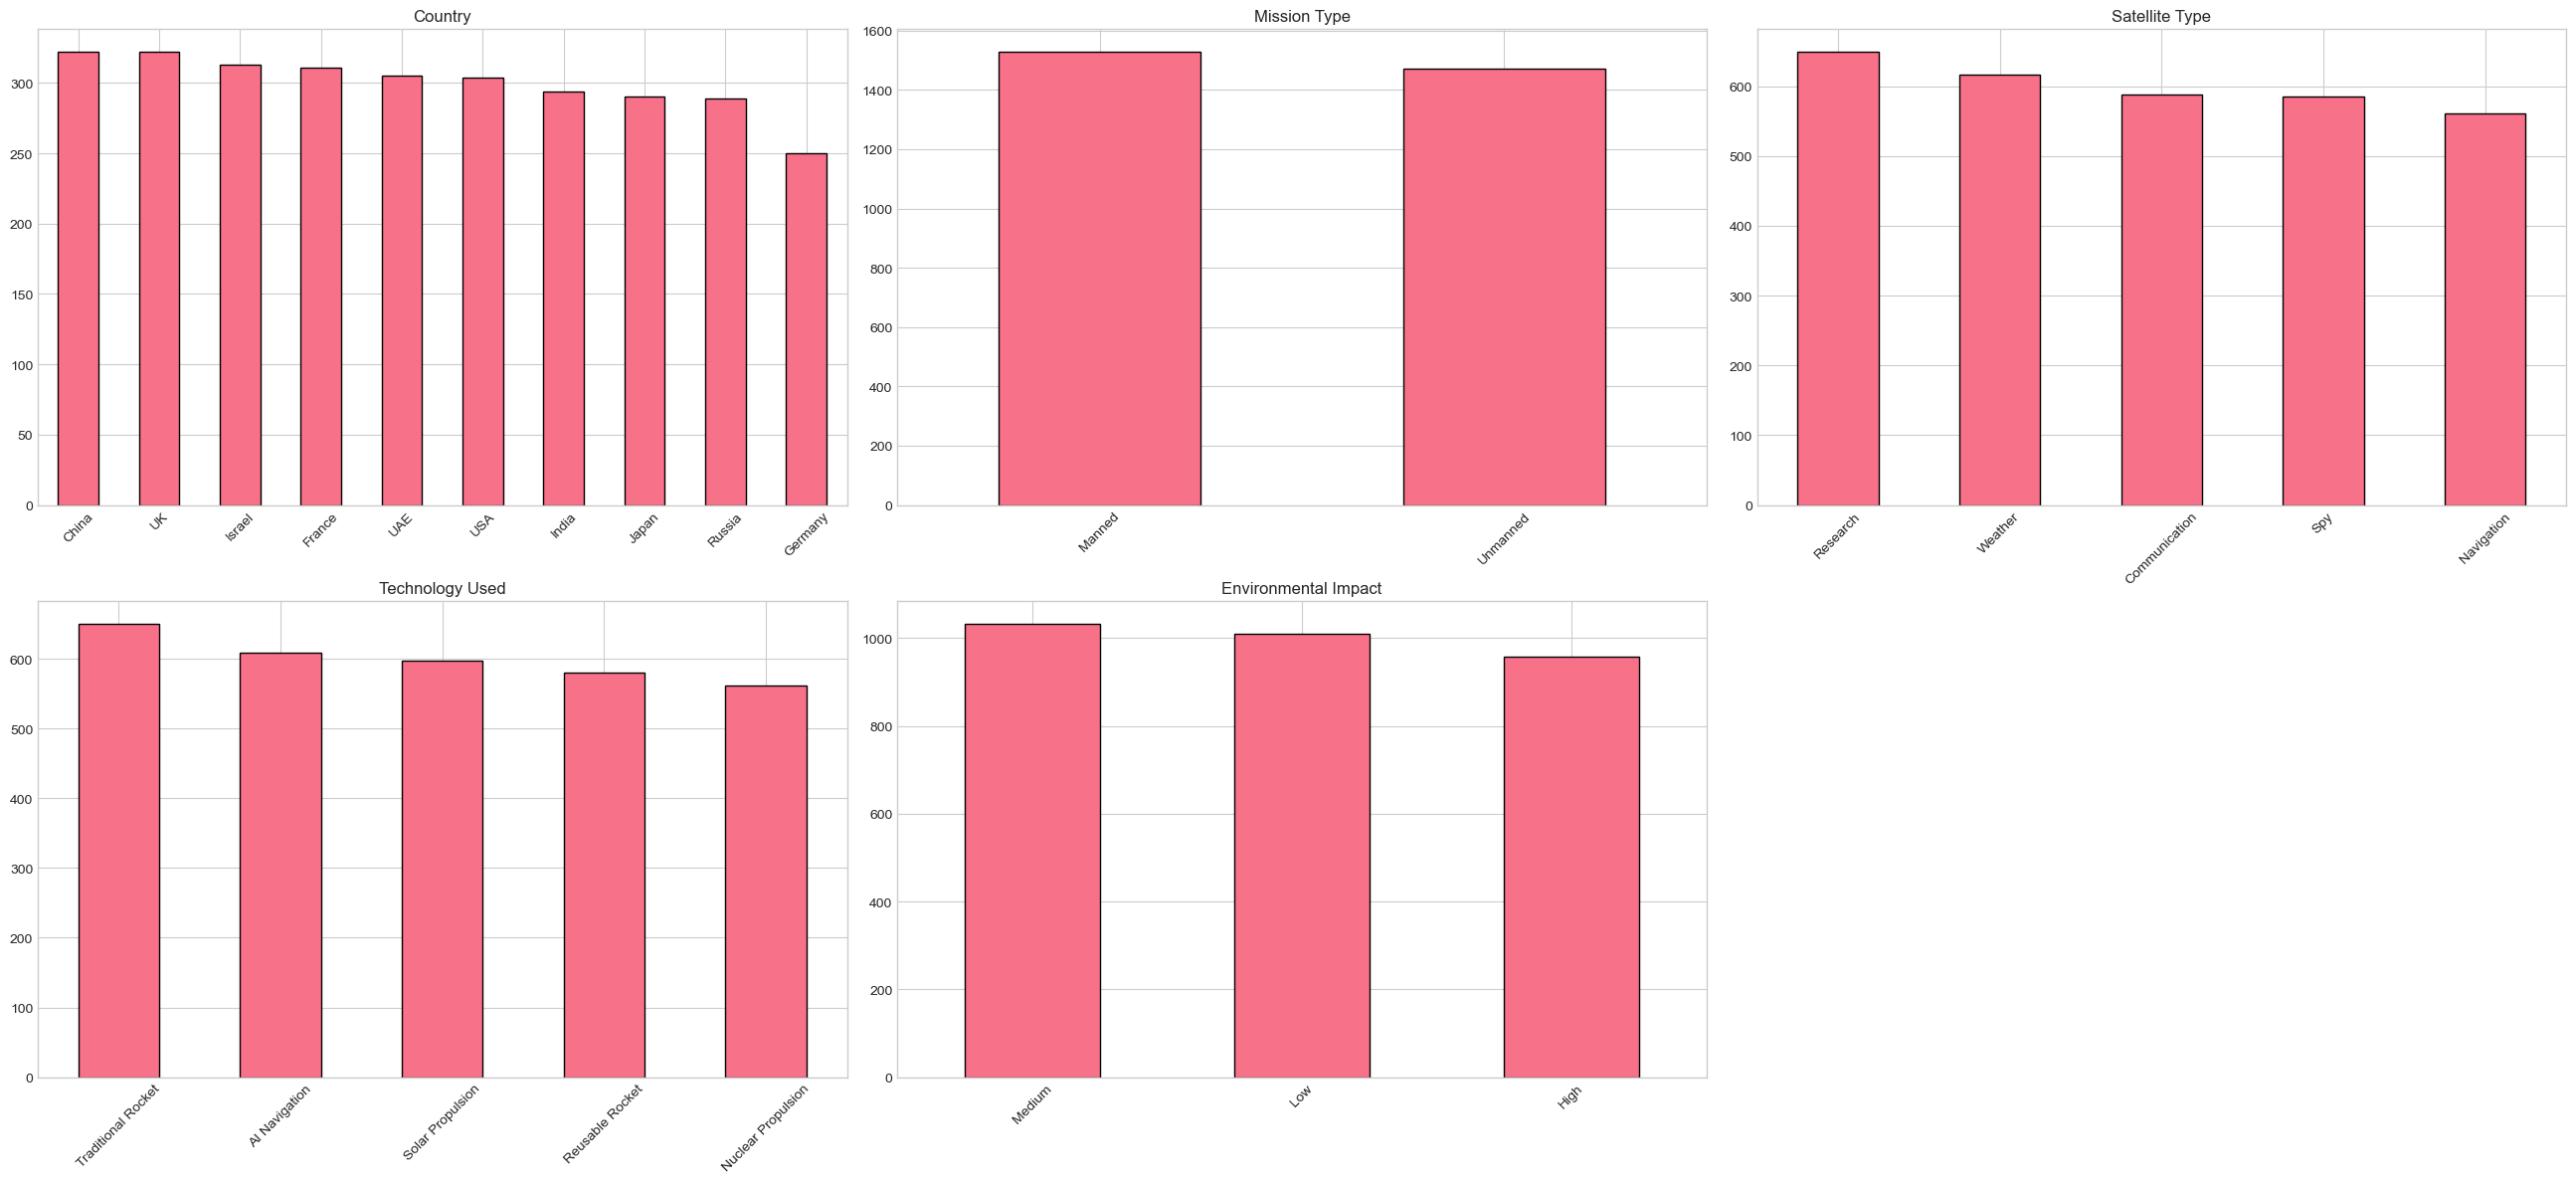

In [35]:
# Visualize categorical features (for columns with reasonable number of categories)
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

if cat_cols_to_plot:
    n_cols = 3
    n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(26, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if len(cat_cols_to_plot) == 1 else axes
    
    for i, col in enumerate(cat_cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(len(cat_cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with ≤10 unique values to plot.")

### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

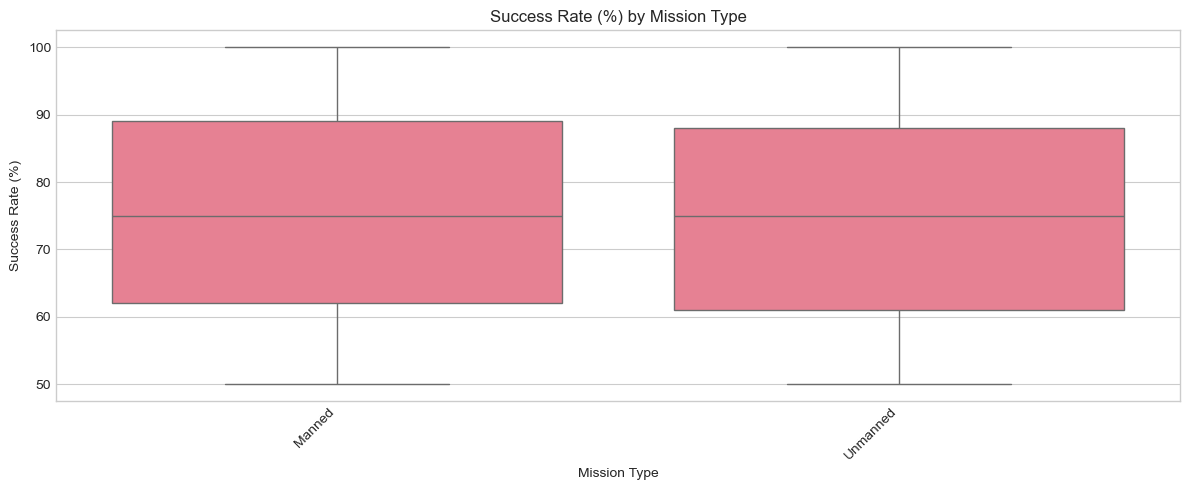


Mean Success Rate (%) by Mission Type:
                   mean  median  count
Mission Type                          
Manned        75.234293    75.0   1528
Unmanned      74.726223    75.0   1472



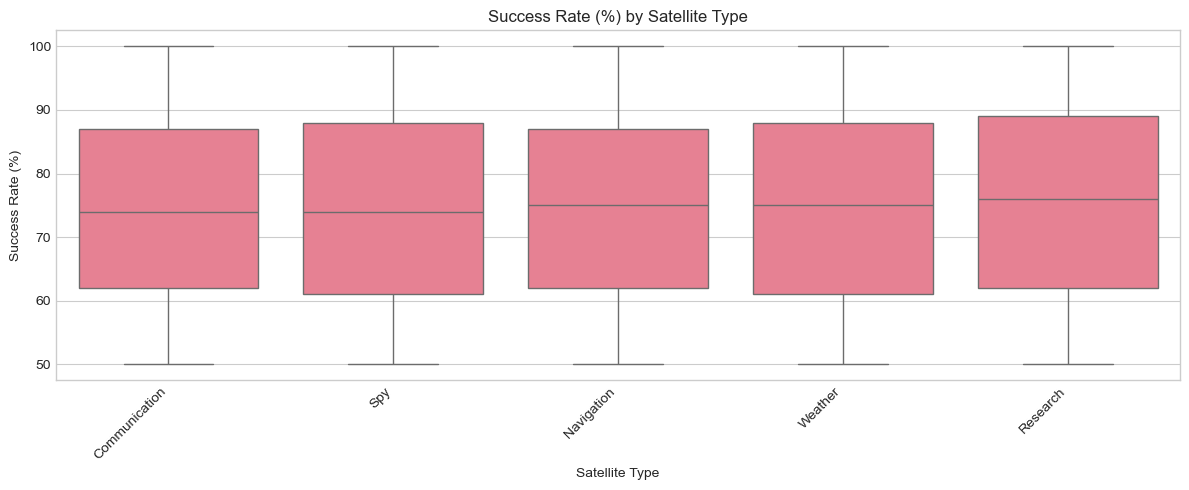


Mean Success Rate (%) by Satellite Type:
                     mean  median  count
Satellite Type                          
Research        75.893683    76.0    649
Navigation      75.007130    75.0    561
Communication   74.729592    74.0    588
Weather         74.727715    75.0    617
Spy             74.483761    74.0    585



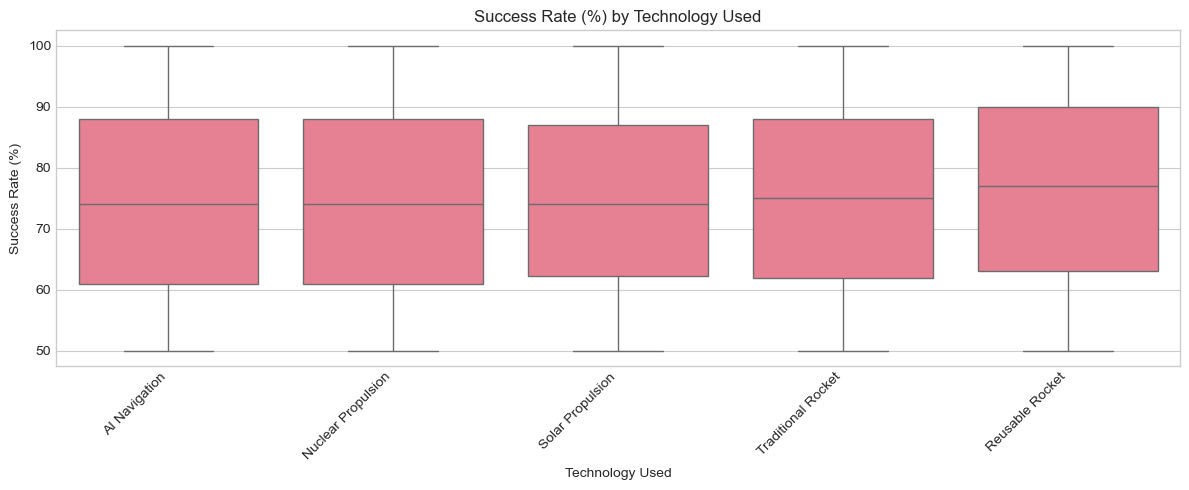


Mean Success Rate (%) by Technology Used:
                         mean  median  count
Technology Used                             
Reusable Rocket     76.225473    77.0    581
Traditional Rocket  75.124615    75.0    650
Solar Propulsion    74.632107    74.0    598
Nuclear Propulsion  74.596085    74.0    562
AI Navigation       74.357964    74.0    609



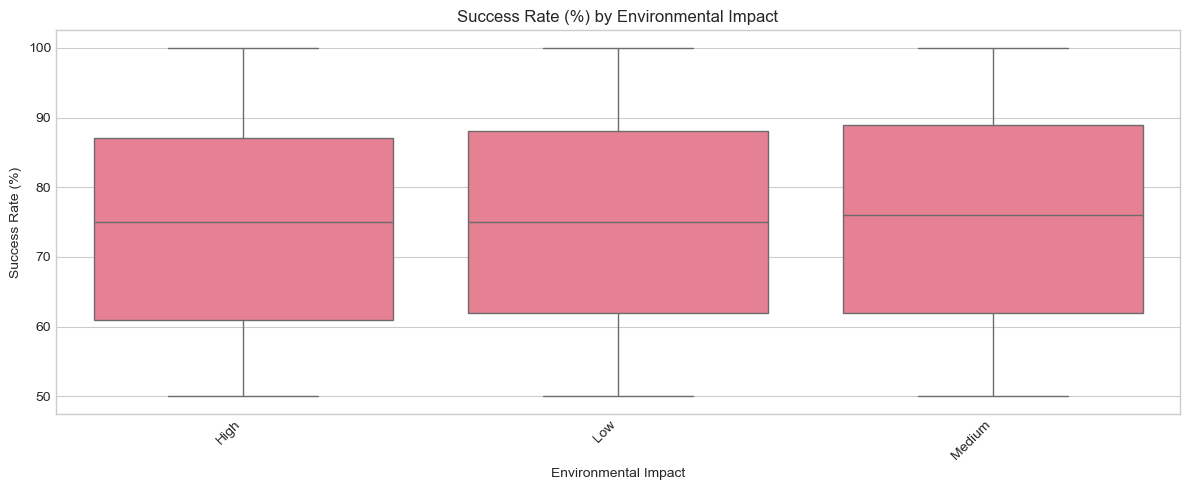


Mean Success Rate (%) by Environmental Impact:
                           mean  median  count
Environmental Impact                          
Medium                75.329457    76.0   1032
Low                   75.093069    75.0   1010
High                  74.500000    75.0    958



In [36]:
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[success_rate].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=success_rate, order=order)
        plt.title(f'{success_rate} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {success_rate} by {col}:")
        print(df.groupby(col)[success_rate].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

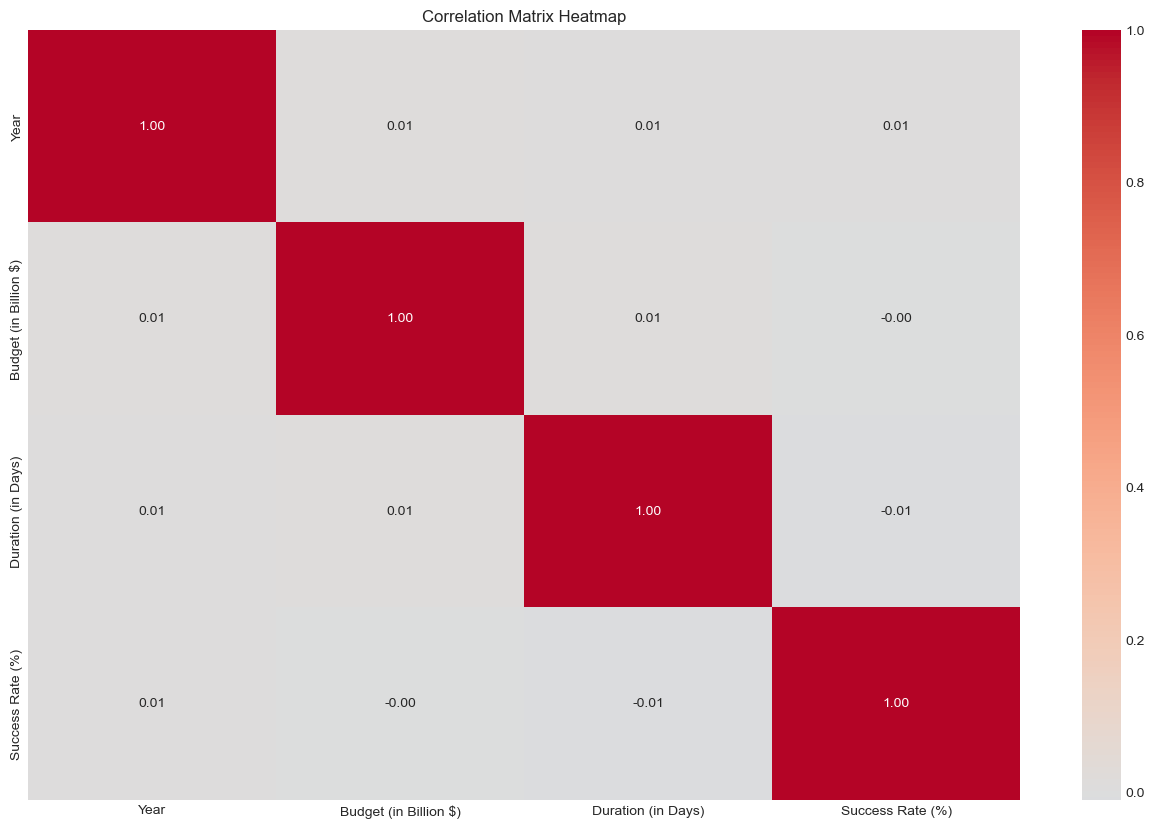

In [43]:
# TODO: Create and visualize a correlation matrix
#
# Steps:
# 1. Create a list of columns: numerical_cols + [TARGET]
# 2. Calculate the correlation matrix: df[columns].corr() *** .corr() used to calculat "relationship strength" 
# 3. Create a heatmap using sns.heatmap()
#
# Heatmap parameters to use:
# - annot=True (show numbers)
# - cmap='coolwarm' (color scheme)
# - center=0 (center colormap at 0)
# - fmt='.2f' (2 decimal places)
#
# Store the correlation matrix in: correlation_matrix
  
columns_to_correlate = numerical_cols + [success_rate]     #*DO NOT MISSPELL the code 
# whats not working
correlation_matrix = df[columns_to_correlate].corr()
# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f'
)
plt.title('Correlation Matrix Heatmap')
plt.show()

# If you plt.title after plt.show() it will creat a new empty plot after your untiltled first one. very neat. only stumped the hell out of me for like 11 second.




In [58]:
# TODO: Extract and analyze correlations with the target variable
#
# Steps:
# 1. Get the TARGET column  from correlation_matrix *** success_rate
# 2. Drop the TARGET's correlation with itself (it's always 1.0)
# 3. Sort values in descending order
# 4. Print the correlations
# 5. Identify strong correlations (absolute value > 0.5)  ****correlations go from 1.0 to -1.0
#
# Store result in: target_correlations ###ughhhhhh
target_correlations = correlation_matrix[success_rate]
target_correlations = target_correlations.drop(success_rate)
target_correlations = target_correlations.sort_values(ascending=False)  #"descending" does not exist

print("Correlations with Success Rate:")
print(target_correlations)
#not parenthsesis or bracket -  says forgot comma - why should i use abs() here? not abs[>0.5] *** double 'target_correlations'
strong_correlations = target_correlations[abs(target_correlations) > 0.5]  

print("\nStrong correlations (|correlation| > 0.5):")
print(strong_correlations)







Correlations with Success Rate:
Year                     0.009213
Budget (in Billion $)   -0.001052
Duration (in Days)      -0.010015
Name: Success Rate (%), dtype: float64

Strong correlations (|correlation| > 0.5):
Series([], Name: Success Rate (%), dtype: float64)


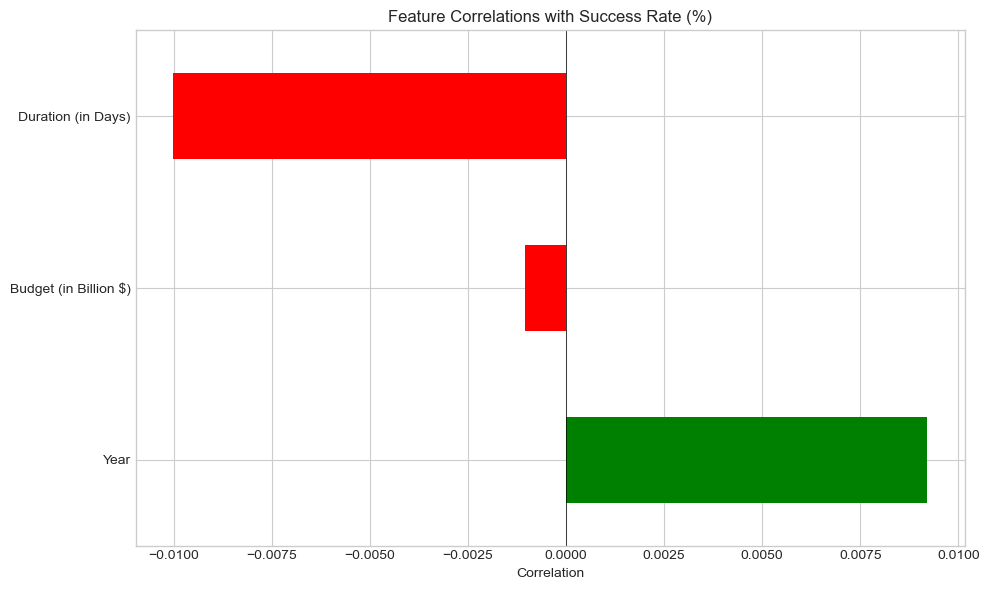

In [59]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {success_rate}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

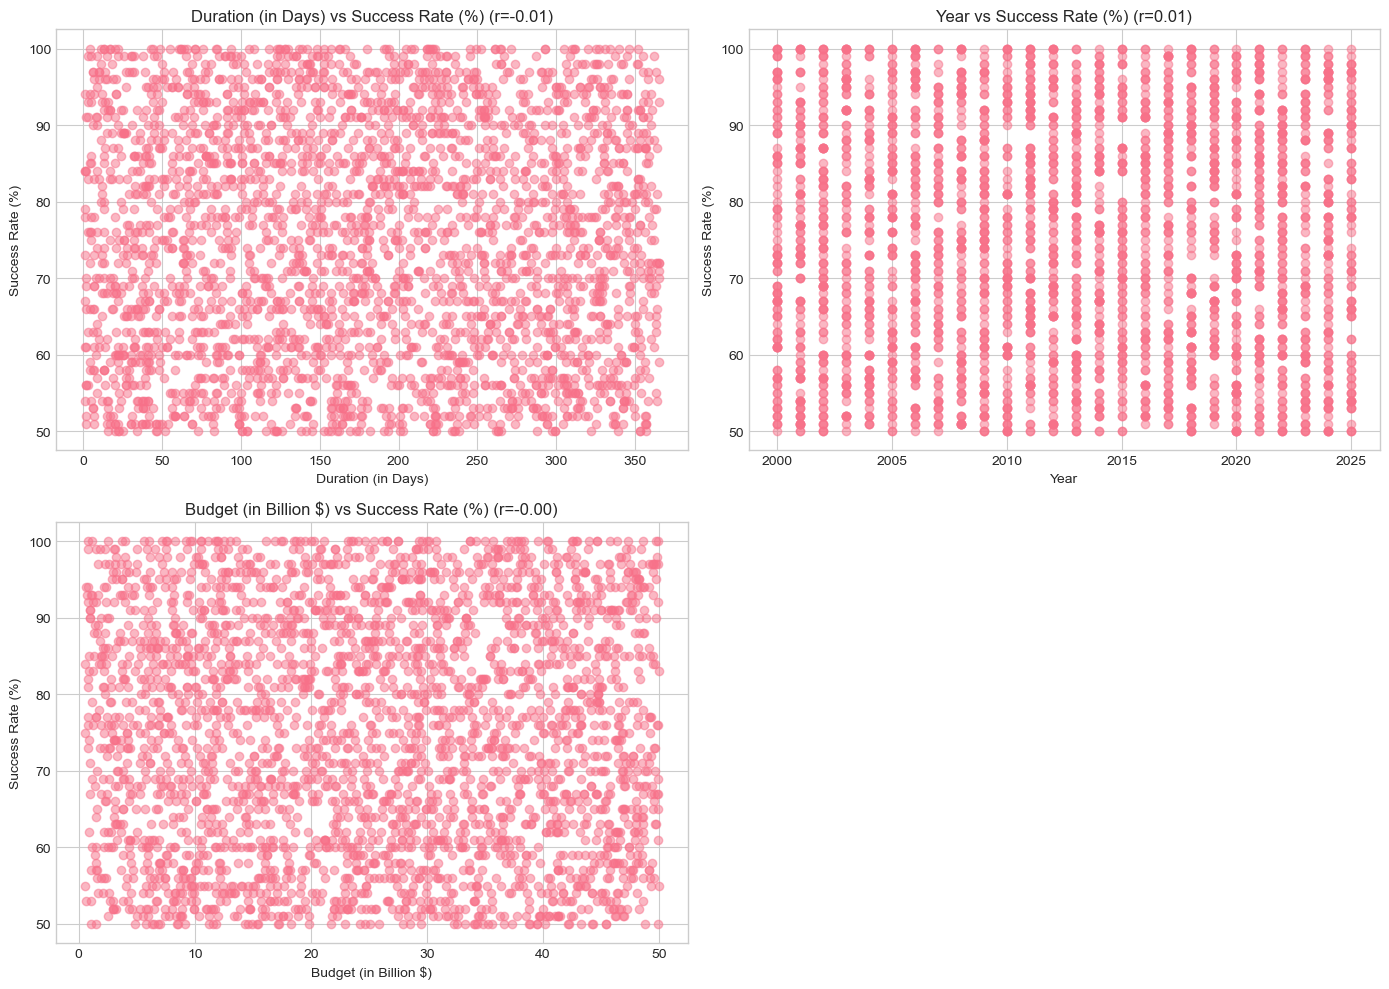

In [64]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[success_rate], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(success_rate)
        corr = df[feature].corr(df[success_rate])
        axes[i].set_title(f'{feature} vs {success_rate} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

Is this supposed to be like this?? does this mean the correlation is good???  *****please let me know, It looks weird****** 

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

In [ ]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!



In [ ]:
# More exploration...



**What additional insights did you discover?**

[Describe any additional findings from your custom exploration]

### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?
- Which categorical features show the biggest differences in target?
- Are there any features that seem unimportant?
- Did you discover any interesting patterns or relationships?
- Are there any concerns about the data (outliers, skewness, etc.)?

**Your summary:**

[Write your summary here]

## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [ ]:
# TODO: Create a copy of your dataframe for cleaning
#
# Why? We want to preserve the original data in case we need to go back.
# Never modify your original dataframe directly!
#
# Store in: df_clean

# YOUR CODE HERE:


print(f"Starting shape: {df_clean.shape}")

In [ ]:
# Identify columns to potentially drop
print("Columns to consider dropping:")
print("="*50)

# 1. High missing rate
high_missing = missing_df[missing_df['Missing %'] > 50].index.tolist()
print(f"\n1. >50% missing values: {high_missing}")

# 2. ID/index columns (no predictive value)
potential_ids = [col for col in df_clean.columns 
                 if 'id' in col.lower() or 'index' in col.lower() or 'url' in col.lower()]
print(f"\n2. Potential ID/URL columns: {potential_ids}")

# 3. High cardinality categorical (too many unique values)
high_cardinality = [col for col in categorical_cols if df_clean[col].nunique() > 100]
print(f"\n3. High cardinality (>100 unique): {high_cardinality}")

# 4. Low variance (same value in most rows)
low_variance = [col for col in df_clean.columns 
                if df_clean[col].value_counts(normalize=True).iloc[0] > 0.95]
print(f"\n4. Low variance (>95% same value): {low_variance}")

In [ ]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above
# IMPORTANT: Don't just copy all suggestions - think about each one!

columns_to_drop = [
    # Add column names to drop here, e.g.:
    # 'id',
    # 'url',
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

**Explain which columns you dropped and why:**

[Describe your reasoning]

### 5.2 Handle Duplicate Rows

In [ ]:
# TODO: Remove duplicate rows from df_clean
#
# Steps:
# 1. Store the row count before: len(df_clean)
# 2. Use df_clean.drop_duplicates() to remove duplicates (assign back to df_clean)
# 3. Store the row count after
# 4. Print how many duplicates were removed

# YOUR CODE HERE:


### 5.3 Handle Missing Values

In [ ]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

In [ ]:
# Handle missing values
# TODO: Add your missing value handling code here
# 
# STRATEGIES:
# - Numerical columns: use median (robust to outliers) or mean
# - Categorical columns: use mode or 'Unknown'
# - Drop rows if missing target variable
#
# Examples:
# df_clean['column'] = df_clean['column'].fillna(df_clean['column'].median())
# df_clean['column'] = df_clean['column'].fillna('Unknown')
# df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!

# YOUR CODE HERE:



In [ ]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

**Explain your missing value strategy:**

[Describe what you did for each column and why]

### 5.4 Handle Outliers (if needed)

In [ ]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

In [ ]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed
#
# STRATEGIES:
# - Remove rows with outliers (be careful - losing data)
# - Cap/clip values at bounds
# - Keep them (if they're valid data points)
#
# Examples:
# df_clean = df_clean[df_clean['price'] > 0]  # Remove invalid prices
# df_clean = df_clean[df_clean['price'] < 500000]  # Remove extreme prices
# df_clean['column'] = df_clean['column'].clip(lower=0, upper=upper_bound)

# YOUR CODE HERE:



**Explain your outlier handling strategy (or why you kept them):**

[Describe what you did and why]

### 5.5 Data Type Corrections

In [ ]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

In [ ]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed
#
# Examples:
# df_clean['year'] = df_clean['year'].astype(int)
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category'] = df_clean['category'].astype('category')

# YOUR CODE HERE:



## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [ ]:
# Create new features
# TODO: Add your feature engineering code here
#
# Examples:
# df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft']
# df_clean['log_price'] = np.log1p(df_clean['price'])
# df_clean['age'] = 2026 - df_clean['year']

# YOUR CODE HERE:



**Explain your new features:**

[Describe what features you created and why they might help predict the target]

### 6.2 Encode Categorical Variables

In [ ]:
# TODO: Identify categorical columns that need encoding
#
# Steps:
# 1. Get categorical columns using select_dtypes(include=['object', 'category'])
# 2. For each column, print:
#    - Column name
#    - Number of unique values: .nunique()
#    - Recommendation: "one-hot encoding" if <= 10 unique, else "consider label encoding or dropping"
#
# Store in: cat_cols

# YOUR CODE HERE:


In [ ]:
# Encode categorical variables
# TODO: Add your encoding code here
#
# STRATEGIES:
# - One-hot encoding: for low cardinality (< 10 unique values)
# - Label encoding: for ordinal data or high cardinality
# - Target encoding: advanced technique (be careful of data leakage)
#
# Examples:
# One-hot encoding:
# df_clean = pd.get_dummies(df_clean, columns=['category_col'], drop_first=True)
#
# Label encoding:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['encoded_col'] = le.fit_transform(df_clean['category_col'])

# YOUR CODE HERE:



**Explain your encoding strategy:**

[Describe what encoding methods you used and why]

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

In [ ]:
# YOUR ADDITIONAL FEATURE ENGINEERING CODE HERE
# Add as many cells as you need!



**Explain your additional feature engineering:**

[Describe any additional features you created and your reasoning]

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [ ]:
# TODO: Identify numerical features and check their ranges
#
# Steps:
# 1. Get numerical columns from df_clean (excluding TARGET)
# 2. For each column, print the min, max, and range
#
# This helps you understand if features need scaling (different scales = need scaling)
#
# Store in: numerical_features

# YOUR CODE HERE:


### 6.5 Final Sanity Checks

In [ ]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

### 6.6 Save Processed Data

In [ ]:
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

In [ ]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**

[Write a thorough summary of everything you did to clean and transform the data]

**Final feature list for modeling:**

[List all the features you'll use in your models]

---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---